# 과제 - 타이타닉 데이터 셋


## 류연준(2022100861)

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore')

submission = pd.read_csv('data/gender_submission.csv')

# 1. 데이터 정의 설명
| Key | 정의 | 비고 |
|-----|-----|-----|
| PassengerID | 각 승객의 고유 번호| |
|Survived | 생존 여부 | 0 = 사망, 1 = 생존 |
| Pclass | 객실 등급 |1st = Upper, 2nd = Middle, 3rd = Lower |
| Name | 이름| |
| Sex | 성별 | |
| Age | 나이 | |
| SibSp | 동반한 Sibling(형제자매)와 Spouse(배우자)의 수| |
| Parch | 동반한 Parent(부모) Child(자식)의 수| |
| Ticket | 티켓의 고유번호 | |
| Fare | 티켓의 요금 | |
| Cabin | 객실 번호 | |
| Embarked | 승선한 항 | C = Cherbourg, Q = Queenstown, S = Southampton |

# 2. 기존 데이터 분석

## 2.1. 훈련 데이터 확인

### 2.1.1. 데이터 확인

In [258]:
train_df = pd.read_csv("./data/train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2.1.2. 데이터 요약 분석

In [259]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [260]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [261]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [262]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2.2. 테스트 데이터 확인

#### 2.2.1 데이터 확인

In [263]:
test_df = pd.read_csv("./data/test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### 2.2.2. 테스트 데이터 요약 분석

In [264]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [265]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [266]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 3. 기존 데이터 시각화

### 3.1. 기존 데이터 시각화

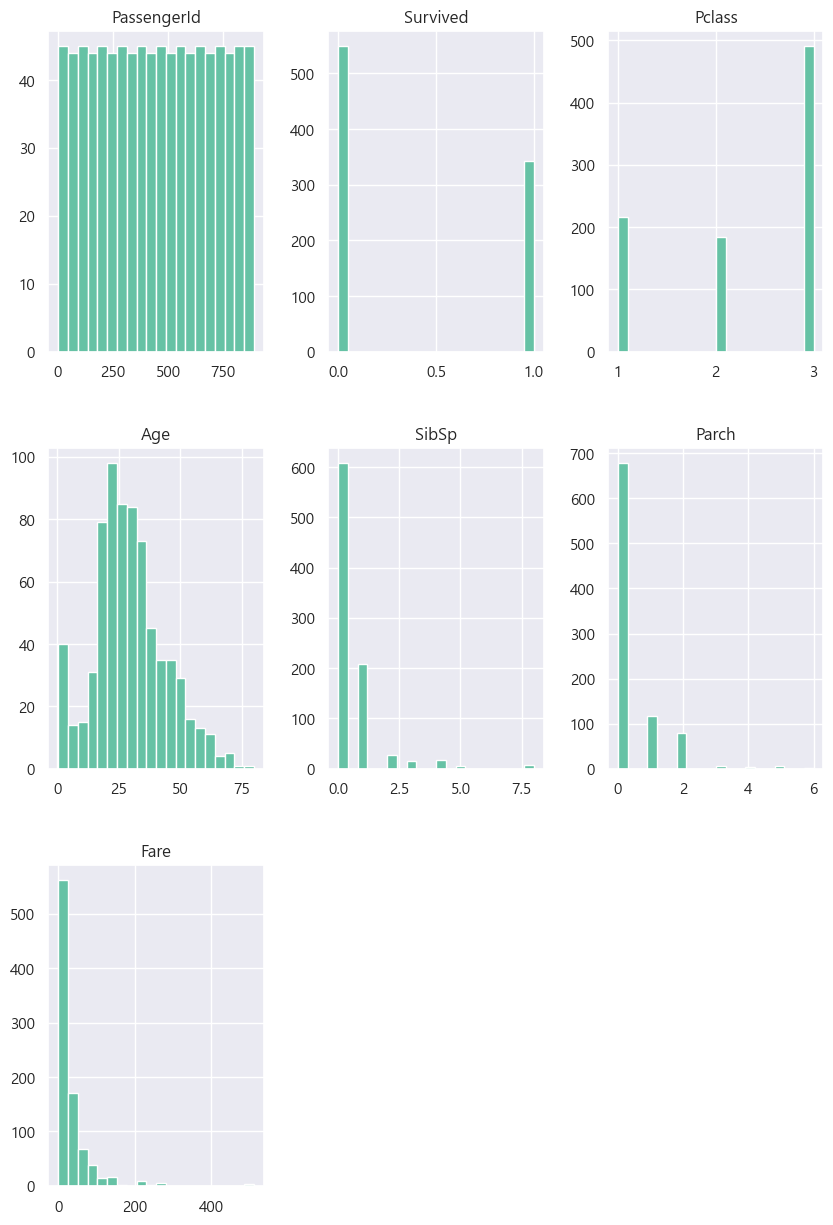

In [267]:
# 전반적인 데이터의 기본적 시각화
%matplotlib inline
import matplotlib.pyplot as plt

train_df.hist(bins = 20, figsize = (10, 15))
plt.show()

### 3.2. 초기 구상과 단일변수에 따른 데이터 시각화
 - 필요한 데이터인 Age, Pclass에 따른 생존율을 시각화

### 초기 구상
 - 나이가 높을수록 보편적으로 경제적 여유가 생기기 때문에 Pclass가 낮아지고(높은 등급의 객실), Pclass 별로 나이에 따른 생존율을 예측


#### 3.2.1. Pclass에 따른 생존율

In [268]:
# 시각화를 위한 함수 구현

plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")

def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame({'Survived': survived, 'Dead': dead}).fillna(0)
    ax = df.plot(kind='bar', stacked=False, width=0.8)
    ax.set_title(f'Survived vs Dead counts by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelrotation=0)
    plt.legend(title="Status")

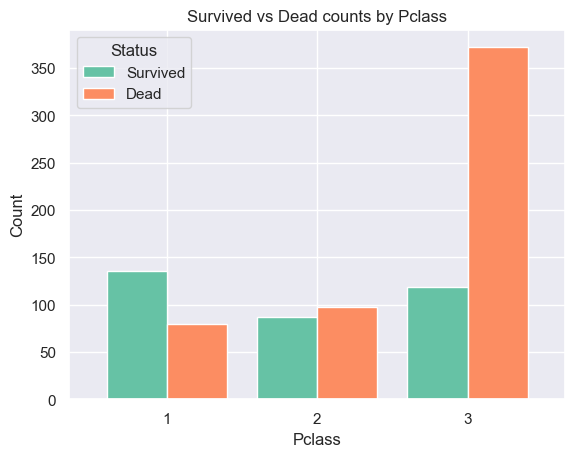

In [269]:
chart(train_df, 'Pclass')

#### 3.2.2. Age 구간에 따른 생존율
 - Age의 범위를 다음과 같이 설정후 시각화

| Range(old) | Range_name |
|-----|-----|
|  0~6 | Baby-Level |
| 7~18 | Boyhood |
| 19~29 | Youth |
| 30~49 | Midlife |
| 65+ | Senior |

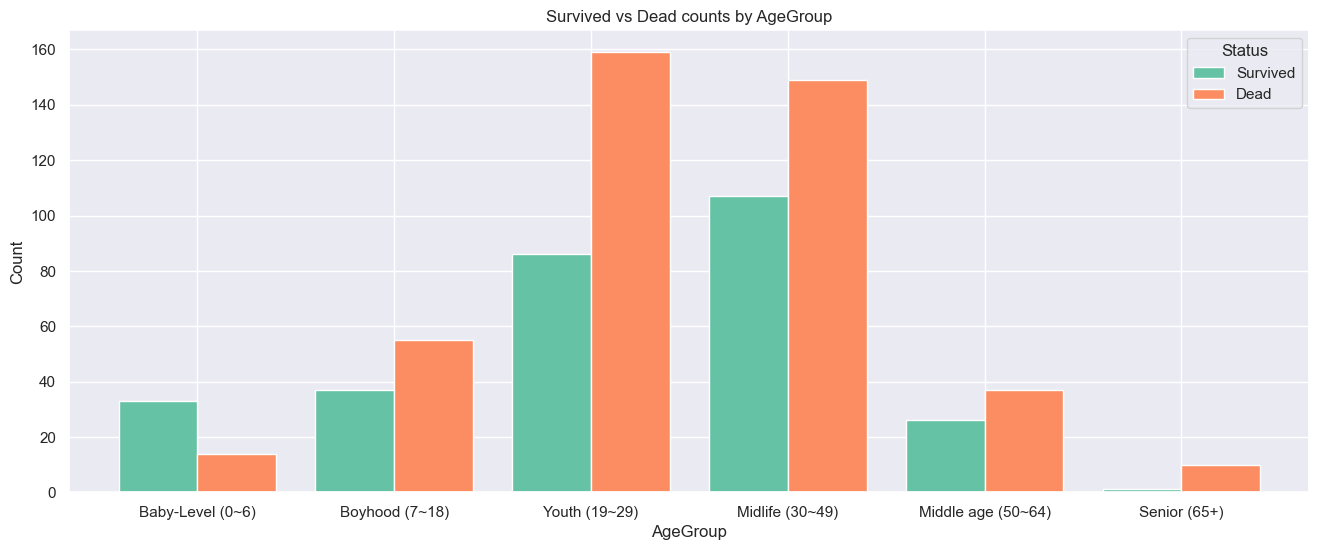

In [270]:
plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")

# 연령 구간 이름과 구간 정의
age_bins = [0, 6, 18, 29, 49, 64, 100]
age_labels = ['Baby-Level (0~6)', 'Boyhood (7~18)', 'Youth (19~29)', 
              'Midlife (30~49)', 'Middle age (50~64)', 'Senior (65+)']

# 나이 구간을 설정하는 새로운 컬럼을 추가
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels)

def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame({'Survived': survived, 'Dead': dead}).fillna(0)
    
    ax = df.plot(kind='bar', stacked=False, width=0.8, figsize=(16, 6))
    ax.set_title(f'Survived vs Dead counts by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelrotation=0)
    plt.legend(title="Status")

# 연령 구간별 생존율 시각화
chart(train_df, 'AgeGroup')

# 4. Age, Pclass 데이터간의 상관관계 증명

### 4.1. 데이터 전처리
 - Name, Ticket, Sex, Embarcked 열은 제거
 - NaN 값이 대부분인 Cabin 열 제거
 - Age 열의 값이 NaN일경우 제거
 - Fare 열의 NaN 값은 평균으로 변환
 - Age Range에 따라 순서대로 0, 1, 2, 3, 4, 5로 변환

#### 4.1.1 훈련 데이터 전처리

In [271]:
df = train_df.copy()

# 불필요한 열 제거
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2
df.loc[pd.isna(df['Embarked']), 'Embarked'] = 0
df['Embarked'] = df['Embarked'].astype(int)

df.loc[df['Sex'] == 'male', 'Sex'] = 1
df.loc[df['Sex'] == 'female', 'Sex'] = 0
df['Sex'] = df['Sex'].astype(int)

# NaN 값을 평균으로 변환
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Age 열 구간화
df.loc[df['Age'] <= 6, 'Age'] = 0
df.loc[(df['Age'] > 6) & (df['Age'] <= 18), 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 29), 'Age'] = 2
df.loc[(df['Age'] > 29) & (df['Age'] <= 49), 'Age'] = 3
df.loc[(df['Age'] > 49) & (df['Age'] <= 64), 'Age'] = 4
df.loc[df['Age'] > 64, 'Age'] = 5
df['Age'] = df['Age'].astype(int)

print(df.isna().sum())
df

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
AgeGroup       177
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,1,2,1,0,7.2500,0,Youth (19~29)
1,2,1,1,0,3,1,0,71.2833,1,Midlife (30~49)
2,3,1,3,0,2,0,0,7.9250,0,Youth (19~29)
3,4,1,1,0,3,1,0,53.1000,0,Midlife (30~49)
4,5,0,3,1,3,0,0,8.0500,0,Midlife (30~49)
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2,0,0,13.0000,0,Youth (19~29)
887,888,1,1,0,2,0,0,30.0000,0,Youth (19~29)
888,889,0,3,0,3,1,2,23.4500,0,NaN
889,890,1,1,1,2,0,0,30.0000,1,Youth (19~29)


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int32   
 4   Age          891 non-null    int32   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    int32   
 9   AgeGroup     714 non-null    category
dtypes: category(1), float64(1), int32(3), int64(5)
memory usage: 53.4 KB


In [273]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,2.455668,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,0.993800,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,5.000000,8.000000,6.000000,512.329200,2.000000


In [274]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
AgeGroup       177
dtype: int64

#### 4.1.2. 테스트 데이터 전처리

In [275]:
test = test_df.copy()

# 불필요한 열 제거
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2
test.loc[pd.isna(test['Embarked']), 'Embarked'] = 0
test['Embarked'] = test['Embarked'].astype(int)

test.loc[test['Sex'] == 'male', 'Sex'] = 1
test.loc[test['Sex'] == 'female', 'Sex'] = 0
test['Sex'] = test['Sex'].astype(int)

# NaN 값을 평균으로 변환
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

# Age 열 구간화
test.loc[test['Age'] <= 6, 'Age'] = 0
test.loc[(test['Age'] > 6) & (test['Age'] <= 18), 'Age'] = 1
test.loc[(test['Age'] > 18) & (test['Age'] <= 29), 'Age'] = 2
test.loc[(test['Age'] > 29) & (test['Age'] <= 49), 'Age'] = 3
test.loc[(test['Age'] > 49) & (test['Age'] <= 64), 'Age'] = 4
test.loc[test['Age'] > 64, 'Age'] = 5
test['Age'] = test['Age'].astype(int)

print(test.isna().sum())
test


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,3,0,0,7.8292,2
1,893,3,0,3,1,0,7.0000,0
2,894,2,1,4,0,0,9.6875,2
3,895,3,1,2,0,0,8.6625,0
4,896,3,0,2,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,3,0,0,8.0500,0
414,1306,1,0,3,0,0,108.9000,1
415,1307,3,1,3,0,0,7.2500,0
416,1308,3,1,3,0,0,8.0500,0


In [276]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 21.4 KB


In [277]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,2.483254,0.447368,0.392344,35.576535,0.464115
std,120.810458,0.841838,0.481622,0.919262,0.896760,0.981429,55.850103,0.685516
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,1.000000,3.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,1.000000,3.000000,1.000000,0.000000,31.471875,1.000000
max,1309.000000,3.000000,1.000000,5.000000,8.000000,9.000000,512.329200,2.000000


In [278]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### 4.2. 피어슨 상관계수 행렬을 통한 관계 시각화

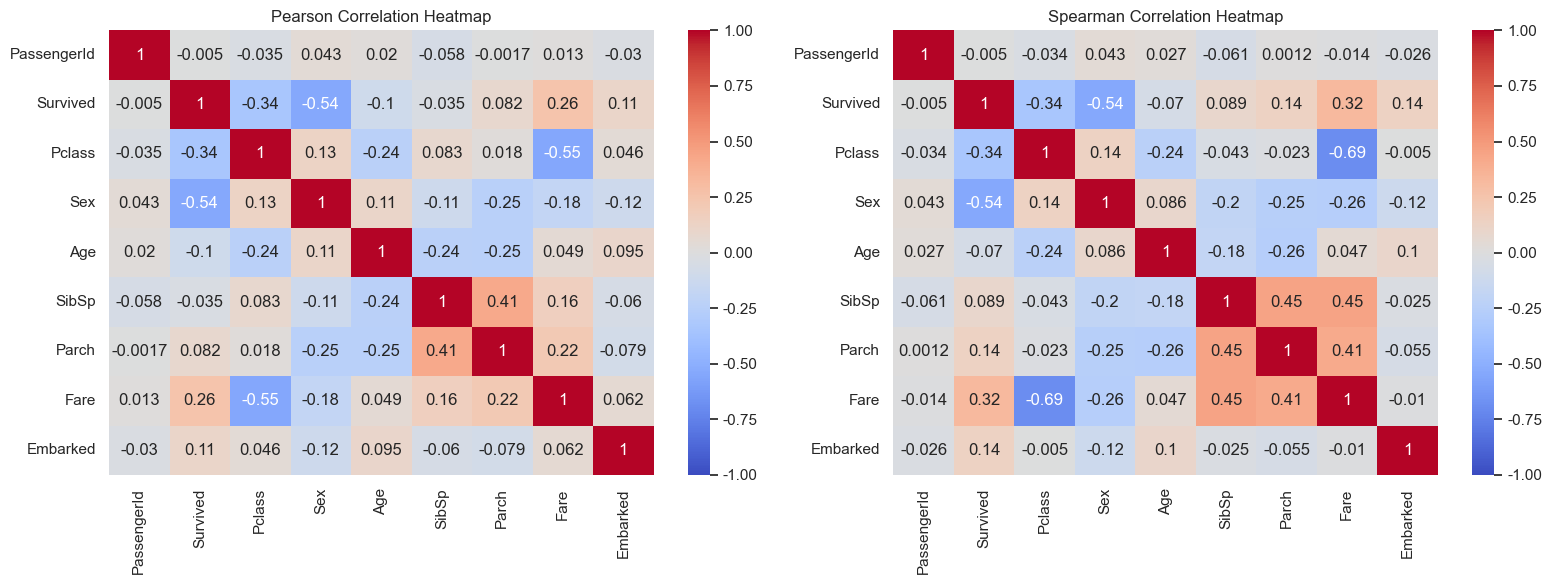

In [279]:
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Pearson Correlation Heatmap')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()

### 4.3. 데이터 분석 결과 및 가설

위의 피어슨 상관관계 행렬을 보면 Survived는 초기에 생각했던 대로 Pclass, Age와 상관관계가 나타남

또한, Pclass와 Age에도 상관관계가 나타남

**따라서, Pclass와 Age를 통해 Survived를 예측하는 머신러닝 작업을 진행할 것**


# 5. 목표 데이터 시각화

### 5.1. 다중 변수 시각화

#### 5.1.1. Pclass 당 Survived 수

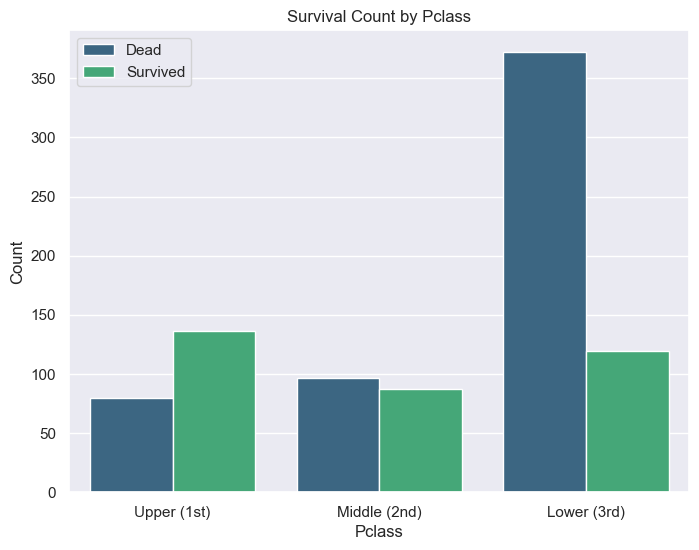

In [280]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="viridis")
plt.title("Survival Count by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ['Upper (1st)', 'Middle (2nd)', 'Lower (3rd)'])
plt.legend(labels=["Dead", "Survived"])
plt.show()

#### 5.1.2. Pclass와 Age 산점도

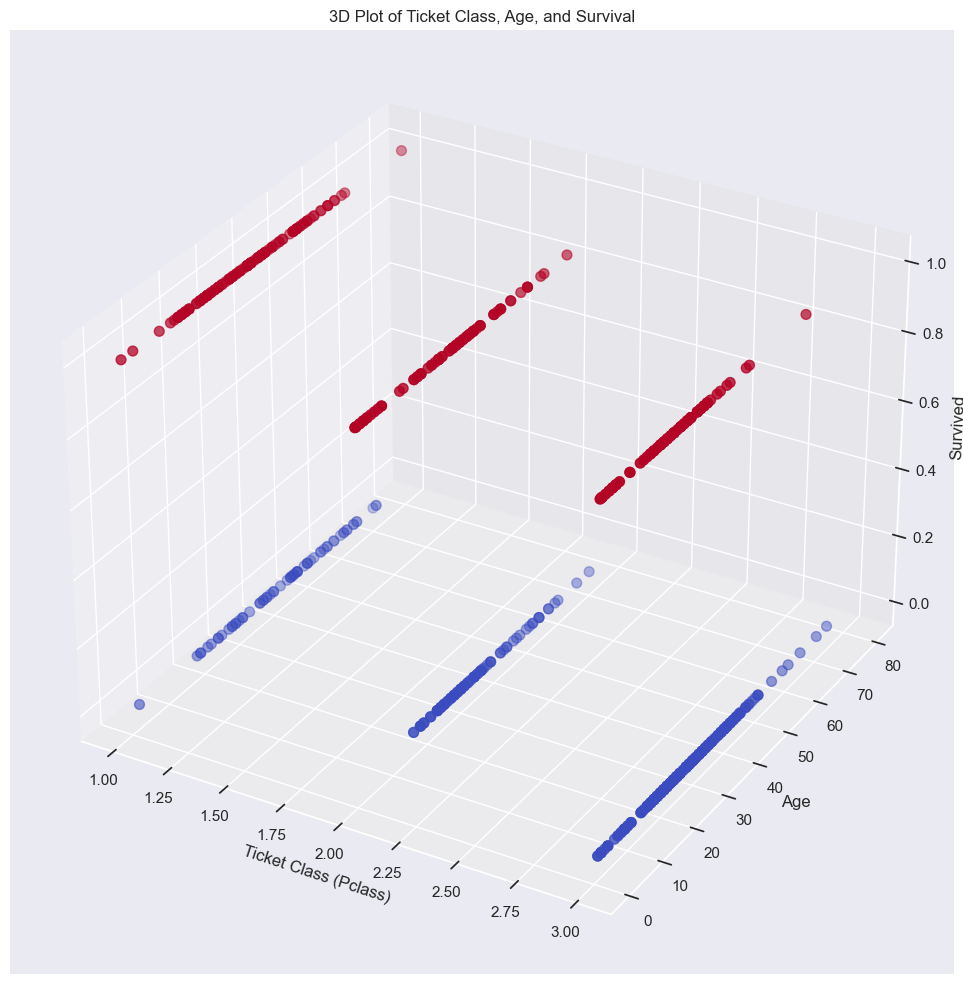

In [281]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(train_df['Pclass'], train_df['Age'], train_df['Survived'], 
                     c=train_df['Survived'], cmap='coolwarm', s=50)

# Set labels and title
ax.set_xlabel("Ticket Class (Pclass)")
ax.set_ylabel("Age")
ax.set_zlabel("Survived")
ax.set_title("3D Plot of Ticket Class, Age, and Survival")

plt.tight_layout()
plt.show()

# 6. 머신러닝 진행

### 6.1 전처리된 데이터의 전체 변수로 훈련 및 예측

In [282]:
w_y = df['Survived']

w_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
w_X = df[w_features]
w_X_test = test[w_features]

w_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=1)
w_model.fit(w_X, w_y)
predictions = w_model.predict(w_X_test)

output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('outputs/whole_submission.csv', index=False)

print("Your whole_submission was successfully saved!")

Your whole_submission was successfully saved!


### 6.2 전처리된 데이터 일부의 변수로 훈련 및 예측

In [283]:
c_y = df['Survived']

c_features = ['Pclass', 'Age']
c_X = df[c_features]
c_X_test = test[c_features]

c_model = RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_split=4, min_samples_leaf=3, random_state=1)
c_model.fit(c_X, c_y)
predictions = c_model.predict(c_X_test)

utput = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('outputs/choice_submission.csv', index=False)
print("Your choice_submission was successfully saved!")

Your choice_submission was successfully saved!


# 7. 실제 제출 결과

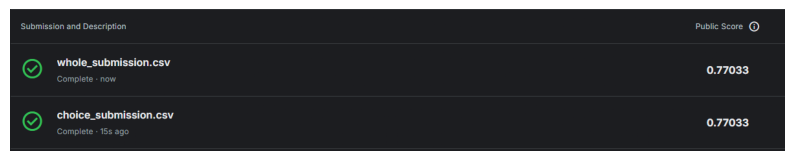

In [284]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'submit_result.png'
img = mpimg.imread(image_path)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

# 8. 결론
#### Pclass 와 Age는 서로 상관관계가 있고 다중변수 시각화를 통해 Survived와 관계성도 나타나지만, 기존 데이터셋을 그대로 학습 시킨것과 Score가 같은 것은 내가 전처리한 데이터 특성의 상관관계가 기존 데이터와 큰 차별점을 갖지 못했던 것. 따라서 이 모델은 유의미한 결과를 내기 어렵다.